In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import ipywidgets as widgets
from IPython import display

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sys
sys.path.append('/h/ashlie/jupyter_helpers')
import plot_helper as ph

import os

In [4]:
def combineDevAndBs(row):
    return row['device'] + ', bs: ' + str(row['bs'])

In [12]:
# time ms in msec, latency us in nsec.
base_path = '/scratch/ashlie/fio_devs/write'
queue_sizes = [
    'q1',
    'q2',
    'q4',
    'q8',
    'q16',
    'q32',
    'q64',
    'q128',
]
#files = [
    #'bs512/_lat.1.log',
    #'bs4096/_lat.1.log',
    #'bs8192/_lat.1.log',
#]
#dev = 'spdk'
latf = 'bs512/_lat.1.log'
devs = [
    'spdk',
    'spdk_bdev',
    'libaio',
    'sync_nvme',
    'sync_ramdisk',
]

files = {}
for dev in devs:
    for qs in queue_sizes:
        files[dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path, qs), dev), latf)

# Total time in sec
total_time = 120
bytes_per_mb = 1024 ** 2

large_fig_dim = (15, 10.6)

In [5]:
data = {}

In [6]:
for k, v in files.iteritems():
    df = ph.read_files([v])[0]
    if k not in data:
        data[k] = {}

    data[k]['average latency (us)'] = df['latency us'].mean()
    data[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [7]:
datadict = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict[k].append(v)
    datadict['device'].append(dev)
    datadict['queue depth'].append(qs)

alldata = pd.DataFrame(datadict)

In [8]:
#alldata['normalized latency'] = alldata['average latency (us)'] / alldata['average latency (us)'][0]

In [ ]:
alldata['bs'] = 512

In [16]:
#alldata

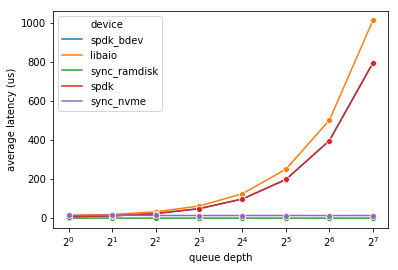

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

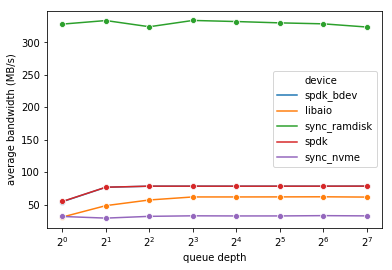

In [10]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=alldata, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

In [29]:
files4k = {}
latf4k = 'bs4096/_lat.1.log'
for dev in devs:
    for qs in queue_sizes:
        files4k[dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path, qs), dev), latf4k)

In [30]:
data4k = {}

In [31]:
for k, v in files4k.iteritems():
    df = ph.read_files([v])[0]
    if k not in data4k:
        data4k[k] = {}

    data4k[k]['average latency (us)'] = df['latency us'].mean()
    data4k[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [32]:
datadict4k = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data4k.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict4k[k].append(v)
    datadict4k['device'].append(dev)
    datadict4k['queue depth'].append(qs)

alldata4k = pd.DataFrame(datadict4k)

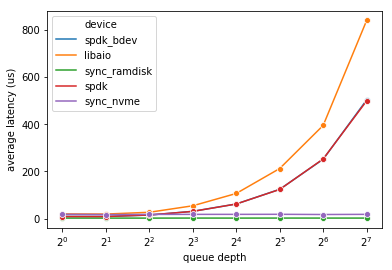

In [33]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata4k, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

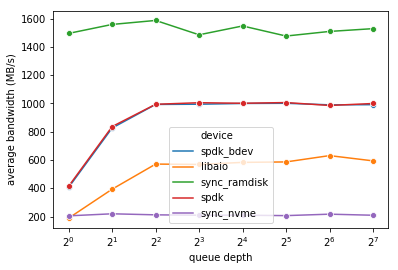

In [34]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=alldata4k, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

In [35]:
files8k = {}
latf8k = 'bs8192/_lat.1.log'
for dev in devs:
    for qs in queue_sizes:
        files8k[dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path, qs), dev), latf8k)

In [36]:
data8k = {}

In [37]:
for k, v in files8k.iteritems():
    df = ph.read_files([v])[0]
    if k not in data8k:
        data8k[k] = {}

    data8k[k]['average latency (us)'] = df['latency us'].mean()
    data8k[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [38]:
datadict8k = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data8k.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict8k[k].append(v)
    datadict8k['device'].append(dev)
    datadict8k['queue depth'].append(qs)

alldata8k = pd.DataFrame(datadict8k)

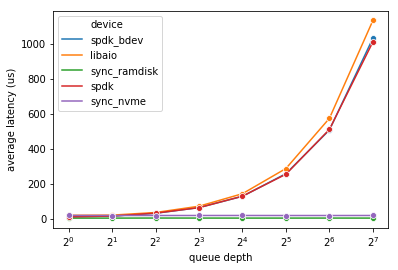

In [39]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata8k, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

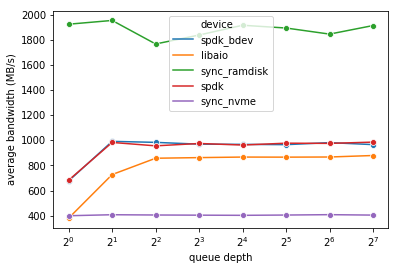

In [40]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=alldata8k, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

In [ ]:
alldata['bs'] = 512
alldata4k['bs'] = 4096
alldata8k['bs'] = 8192

In [10]:
# Dump to files so we can not be so sad.
alldata.to_csv(os.path.join(base_path, 'agg512.csv'), index=False, sep=',')
alldata4k.to_csv(os.path.join(base_path, 'agg4096.csv'), index=False, sep=',')
alldata8k.to_csv(os.path.join(base_path, 'agg8192.csv'), index=False, sep=',')

In [6]:
# Load all the data from dumped files.
alldata = pd.read_csv(os.path.join(base_path, 'agg512.csv'), sep=',')
alldata4k = pd.read_csv(os.path.join(base_path, 'agg4096.csv'), sep=',')
alldata8k = pd.read_csv(os.path.join(base_path, 'agg8192.csv'), sep=',')

In [7]:
combined = pd.DataFrame()
combined = combined.append(alldata)
combined = combined.append(alldata4k)
combined = combined.append(alldata8k)
combined = combined.reset_index()
combined['h'] = combined.apply(combineDevAndBs, axis=1)

In [65]:
#combined

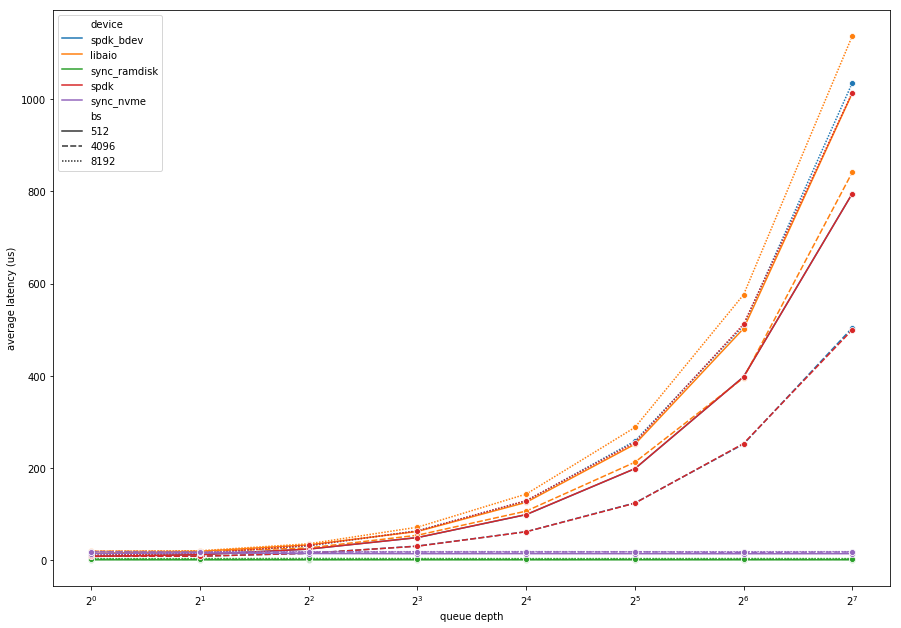

In [13]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=combined, marker='o', hue='device', style='bs')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

In [17]:
combined_short = combined[combined['queue depth'] < 8]

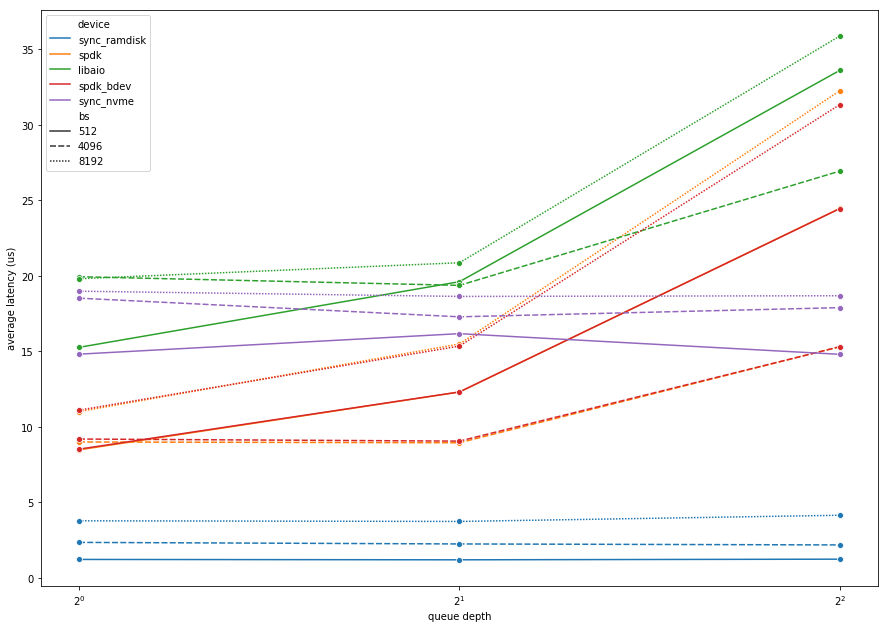

In [18]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=combined_short, marker='o', hue='device', style='bs')
ax.set_xticks([2 ** x for x in range(0, 3)])
ax.set_xscale('log', basex=2)

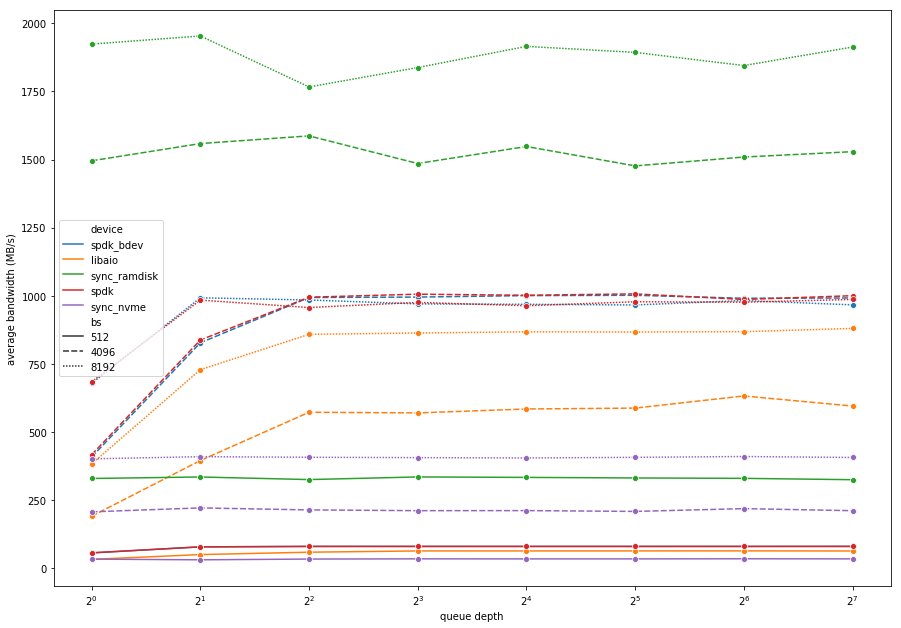

In [16]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=combined, marker='o', hue='device', style='bs')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)